In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SPELL

- 2017310695 이주민

- 2015318579 김정훈

## Score : 0.80171

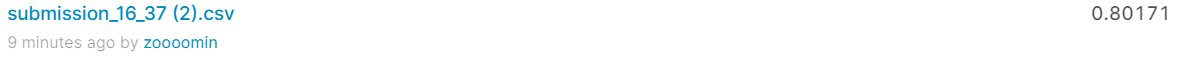

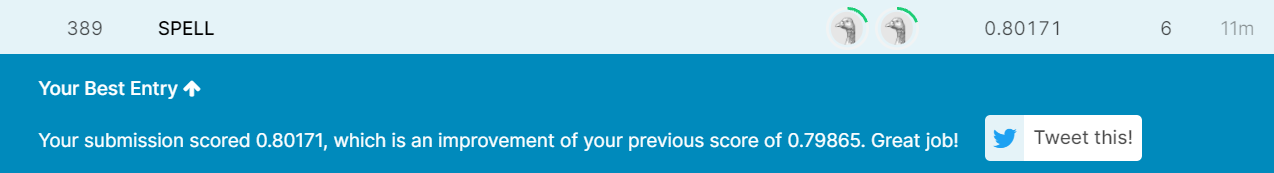

# 데이터 확인

In [3]:
import pandas as pd

train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classificatoin/train.csv", encoding='utf-8')
print('Number of training sentences: ', len(train_df))
train_df.sample(5)

Number of training sentences:  7613


,id,keyword,location,text,target
7416,10609,wounded,NaN,Love is the weapon for this wounded generation...,0
2980,4279,drowning,"Virginia, USA",I'm drowning in spirits to wash you out,0
5792,8264,rioting,Upstate New York,I think Twitter was invented to keep us insomn...,0
1803,2591,crash,NaN,Photoshop CS6 Crash Course http://t.co/cVGJFPB...,0
5824,8315,rubble,NaN,Jun 2015. Yemenis search for survivors under t...,1


In [4]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classificatoin/test.csv", encoding='utf-8')
print('Number of test sentences: ', len(test_df))
test_df.sample(5)

Number of test sentences:  3263


,id,keyword,location,text
2194,7346,obliterate,"Orlando, FL",@TrinityFox_ he would obliterate anyone who ge...
2163,7243,natural%20disaster,NaN,TRAIN ACCIDENT IN HARDA (M.P.) IS NOT NATURAL ...
1919,6475,injured,"Richmond, VA, USA",@Braves_Ninja @david_brelsford For Freddie bef...
2558,8535,screaming,Texas,@LordMinion777 *screaming* i can't go!!!\n:(
545,1783,buildings%20on%20fire,Wherever the music takes me,fucking apartments across the street are on fi...


In [5]:
print("--------------------------------- Negative Sample Disaster Tweets ---------------------------------")
for txt in train_df[train_df.target==0].text.sample(5).values:
  print(txt)

print("\n--------------------------------- Positive Sample Disaster Tweets ---------------------------------")
for txt in train_df[train_df.target==1].text.sample(5).values:
  print(txt)

--------------------------------- Negative Sample Disaster Tweets ---------------------------------
Doone Silver Architects has won permission to demolish Birmingham's Natwest Tower and replace it with what will be cityÛªs tallest building.
My take away: preservation parks r an imposition &amp; a danger to African people. I never imagined!  https://t.co/Gi2P9TUVBI
i s2g if anyone tries to harm my cupcake i'll fucking hunt you down to the end of the earth #HarryBeCareful
Please sign &amp; RT to save #SaltRiverWildHorses http://t.co/IKUAYUSEqt http://t.co/BQBHUyfmE9
@DavidCovucci We can't because a sinkhole swallowed every taco place in the neighborhood

--------------------------------- Positive Sample Disaster Tweets ---------------------------------
Tension In Bayelsa As Patience Jonathan Plans To Hijack APC PDP - http://t.co/ComLG0VdbV
Watching Xela firefighters struggle to save burning buildings last night w/ old equipment makes me so grateful for DCFD @ChR3lyc @IAFF36
China's Stoc

In [5]:
print("Number of None data : ", train_df.text.isna().sum())

Number of None data :  0


In [6]:
print("Positive data: {:.2f}%".format(len(train_df[train_df.target==1])*100/len(train_df)))

Positive data: 42.97%


# 전처리

In [32]:
tweets = train_df.text.values
labels = train_df.target.values

In [33]:
test_tweets = test_df.text.values

## URL 포함 Tweets
Positive Sample들이 URL을 더 많이 포함하고 있는 것을 볼 수 있는데, 이는 재난 상황을 유튜브나 기사를 공유하기 때문인 것 같다.

따라서, Classification에 http 뒤의 내용은 불필요하지만 http 자체는 중요한 단서가 될 것이므로 전처리시 http는 유지하도록 한다.

In [9]:
print("percentage of POSITIVE samples containing http URLs at the end: {:.2f}%".format(len([t for t in train_df[train_df['target']==1]['text'] if "http://" in t])*100/len(train_df[train_df['target']==1])))
print("percentage of NEGATIVE samples containing http URLs at the end: {:.2f}%".format(len([t for t in train_df[train_df['target']==0]['text'] if "http://" in t])*100/len(train_df[train_df['target']==0])))

percentage of POSITIVE samples containing http URLs at the end: 62.86%
percentage of NEGATIVE samples containing http URLs at the end: 35.65%


In [34]:
tweets = [" ".join([word if 'http://' not in word else "http" for word in t.split()]) for t in tweets]
tweets[-1]

'The Latest: More Homes Razed by Northern California Wildfire - ABC News http'

In [35]:
test_tweets = [" ".join([word if 'http://' not in word else "http" for word in t.split()]) for t in test_tweets]

## Tag 포함 Tweets

Negative Sample에 tags가 10%정도 더 많은 것을 볼 수 있다. 

하지만, 언급된 user의 이름은 불필요하므로 user 이름은 지워주도록 한다.

In [12]:
print("percentage of POSITIVE samples containing @user_id tag: {:.2f}%".format(len([t for t in train_df[train_df['target']==1]['text'] if "@" in t])*100/len(train_df[train_df['target']==1])))
print("percentage of NEGATIVE samples containing @user_id tag: {:.2f}%".format(len([t for t in train_df[train_df['target']==0]['text'] if "@" in t])*100/len(train_df[train_df['target']==0])))

percentage of POSITIVE samples containing @user_id tag: 20.67%
percentage of NEGATIVE samples containing @user_id tag: 31.39%


In [36]:
tweets = [" ".join([word if '@' not in word else "@" for word in t.split()]) for t in tweets]
tweets[-4]

'@ @ The out of control wild fires in California even in the Northern part of the state. Very troubling.'

In [37]:
test_tweets = [" ".join([word if '@' not in word else "@" for word in t.split()]) for t in test_tweets]

## Hash Tag 포함 Tweets

Positive와 Negative Tweets의 차이가 5% 정도이며, Hash Tag는 내용이 중요하므로 #기호는 지우도록 한다.

In [15]:
print("percentage of POSITIVE samples containing # tag: {:.2f}%".format(len([t for t in train_df[train_df['target']==1]['text'] if "#" in t])*100/len(train_df[train_df['target']==1])))
print("percentage of NEGATIVE samples containing # tag: {:.2f}%".format(len([t for t in train_df[train_df['target']==0]['text'] if "#" in t])*100/len(train_df[train_df['target']==0])))

percentage of POSITIVE samples containing # tag: 26.75%
percentage of NEGATIVE samples containing # tag: 20.41%


## 각종 이모티콘 및 기호 제거 & 소문자화 & 오타 고침

In [ ]:
! pip install contractions
import nltk
nltk.download('all')
import re
import contractions
from nltk.corpus import wordnet

In [13]:
def remove_repeated_characters(text):
  tokens = nltk.word_tokenize(text)
  repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)') # characters occur twice
  match_substitution = r'\1\2\3'
  def replace(old_word):
    if wordnet.synsets(old_word): # check if old_word is valid
      return old_word
    new_word = repeat_pattern.sub(match_substitution, old_word)
    return replace(new_word) if new_word != old_word else new_word

  text = " ".join([replace(word) for word in tokens])
  return text

In [18]:
def text_clean(text):
    text = contractions.fix(text) #he's -> he is
    text = re.sub('<br />'," ",text)  
    text = re.sub('[^a-zA-Z@]',' ',text) # 영어와 @만 사용
    text = re.sub('\s+', ' ', text) # 중복 띄어쓰기 삭제
    text = remove_repeated_characters(text)
    text = text.lower() # 소문자
    return text.strip() # 앞 뒤 문장 공백 제거

In [19]:
print("------------------------------------ EXAMPLES ------------------------------------")
print(text_clean(tweets[-4]))
print(text_clean(tweets[0]))
print(text_clean(tweets[15]))

------------------------------------ EXAMPLES ------------------------------------
@ @ the out of control wild fires in california even in the northern part of the state very troubling
our deeds are the reason of this earthquake may allah forgive us all
what is up man


In [38]:
tweets = [text_clean(t) for t in tweets]
test_tweets = [text_clean(t) for t in test_tweets]

# Lemmatize

In [15]:
import spacy
import en_core_web_sm
from spacy.lang.en import English
from tqdm import tqdm

In [16]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) 
spacy_stopwords=spacy.lang.en.stop_words.STOP_WORDS

In [17]:
def spacy_lemma(text):
    text = nlp(text)
    temp = [token.lemma_ for token in text if token.lemma_ not in ['-PRON-'] + list(spacy_stopwords)]
    return " ".join(temp)

In [18]:
print("------------------------------------ EXAMPLES ------------------------------------")
print("Before lemmatization and remove stopwords : ",tweets[-4])
print("After lemmatization and remove stopwords : ",spacy_lemma(tweets[-4]))

------------------------------------ EXAMPLES ------------------------------------
Before lemmatization and remove stopwords :  the out of control wild fires in california even in the northern part of the state very troubling
After lemmatization and remove stopwords :  control wild fire california northern state troubling


In [39]:
tweets = [spacy_lemma(t) for t in tweets]
test_tweets = [spacy_lemma(t) for t in test_tweets]

# Word Vectorizer


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
    
x_train, x_val, y_train, y_val = train_test_split(tweets, labels, test_size = 0.3, random_state = 44)

tfidf_vect.fit(x_train)
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_val_tfidf_vect = tfidf_vect.transform(x_val)
x_test_tfidf_vect = tfidf_vect.transform(test_tweets)

# Model

## SVM

In [21]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix

def SVM(x_train_tfidf_vect, x_val_tfidf_vect, x_test_tfidf_vect):
    SVM = SVC(kernel= 'rbf')
    SVM.fit(x_train_tfidf_vect, y_train)
    
    y_pred = SVM.predict(x_val_tfidf_vect)
    pred = SVM.predict(x_test_tfidf_vect)
    submission = pd.DataFrame(test_df.id)
    submission['target'] = pred

    print("Testing Accuracy:",accuracy_score(y_val, y_pred))
    
    print(classification_report(y_val, y_pred))

    print("\nConfusion Matrix:\n")
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    conf = pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: No Disaster(0)", "label: Disaster(1)"], columns = ["predicted: No Disaster(0)", "predicted: Disaster(1)"])
    print(conf)
    return(tfidf_vect, submission)

In [41]:
tfidf_dict = tfidf_vect.get_feature_names()
print(len(tfidf_dict))

9785


In [45]:
vectorizer, submission = SVM(x_train_tfidf_vect, x_val_tfidf_vect, x_test_tfidf_vect)

Testing Accuracy: 0.8073555166374781
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1274
           1       0.87      0.67      0.75      1010

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.82      0.81      0.80      2284


Confusion Matrix:

                       predicted: No Disaster(0)  predicted: Disaster(1)
label: No Disaster(0)                       1172                     102
label: Disaster(1)                           338                     672


In [46]:
submission.to_csv('submission_16_37.csv', index=False)

In [47]:
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


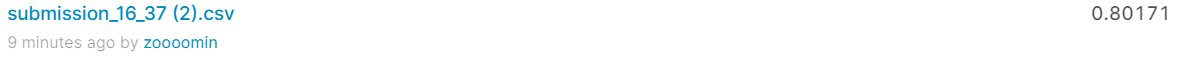

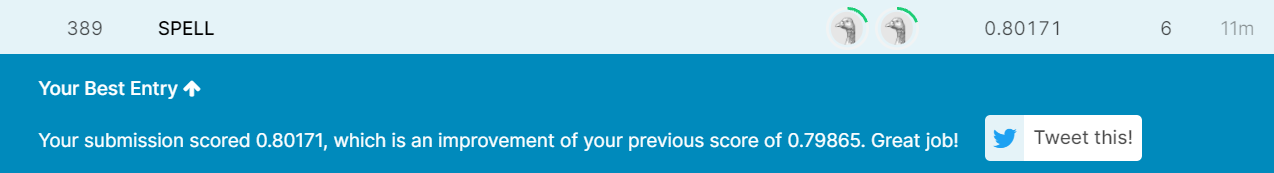

## LSTM

In [37]:
import tensorflow as tf 
from tensorflow.keras import layers

MAX_TOKENS = 10000
EMBEDDING_SIZE = 512

text_vectorizer = layers.TextVectorization(max_tokens=MAX_TOKENS)
text_vectorizer.adapt(tweets)

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = layers.Embedding(MAX_TOKENS, EMBEDDING_SIZE)(x)
x = layers.Bidirectional(layers.LSTM(128, activation='relu', return_sequences=True))(x)
x = layers.LSTM(64,activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs, outputs)

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 512)         5120000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         656384    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,858,625
Trainable params: 5,858,625
Non-trainable params: 0
_________________________________________________

In [39]:
import numpy as np

model.compile(optimizer='adam', 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics = ['accuracy'])

x_train, y_train, x_val, y_val = np.array(x_train), np.array(y_train), np.array(x_val), np.array(y_val)

history = model.fit(x_train, y_train,
          validation_data = (x_val, y_val),
          epochs = 2, 
          callbacks = [tf.keras.callbacks.ModelCheckpoint('NLP_Checkpoint\\NLP_model', 
                                                          monitor='val_loss',
                                                          save_best_only = True)])

Epoch 1/2
167/167 [==============================] - 30s 154ms/step - loss: 0.5416 - accuracy: 0.7247 - val_loss: 0.4384 - val_accuracy: 0.8113
INFO:tensorflow:Assets written to: NLP_Checkpoint\NLP_model/assets
Epoch 2/2
167/167 [==============================] - 25s 149ms/step - loss: 0.3132 - accuracy: 0.8771 - val_loss: 0.4528 - val_accuracy: 0.7951


In [35]:
model.evaluate(x_val, y_val)

72/72 [==============================] - 1s 14ms/step - loss: 2.3080 - accuracy: 0.7588


[2.308016061782837, 0.7587658762931824]

In [40]:
preds = model.predict(np.array(test_tweets))
preds = tf.squeeze(tf.round(preds))
preds = tf.cast(preds, tf.int32)

submission = pd.DataFrame(test_df.id)
submission['target'] = preds

submission.to_csv('submission_LSTM.csv', index=False)

In [41]:
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


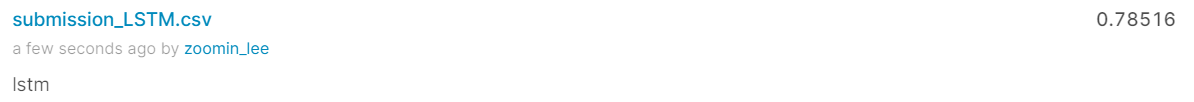